# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 17.648s 


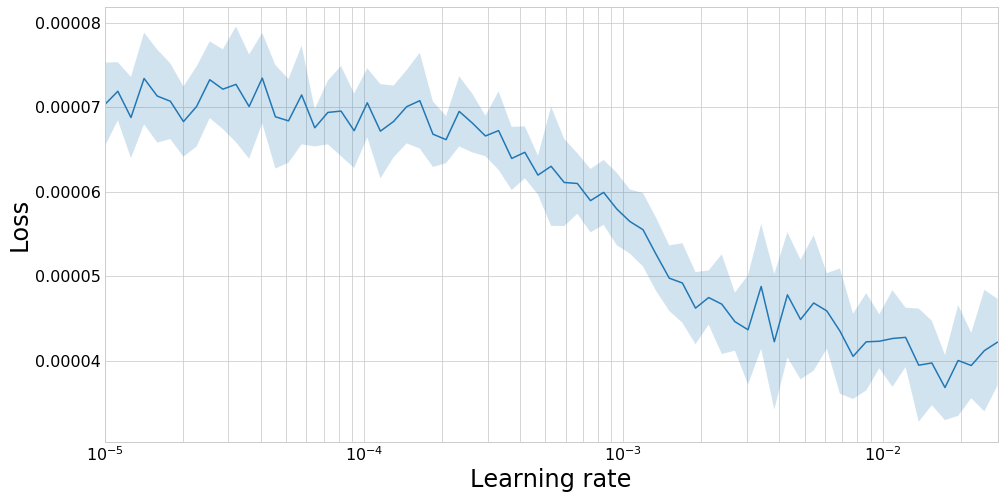

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [9]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':1e-2}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248891). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124847). Check your callbacks.
  % delta_t_median)


1 New best found: 3.414659953810957e-05
3 New best found: 3.279206178373124e-05
6 New best found: 3.245469552462533e-05
7 New best found: 3.214998303493211e-05
12 New best found: 3.2004980454810575e-05
13 New best found: 3.169383804504193e-05
14 New best found: 3.162266656498057e-05
15 New best found: 3.1595335555667906e-05
27 New best found: 3.1419277373097796e-05
28 New best found: 3.136888926785561e-05
29 New best found: 3.1306481184860215e-05
30 New best found: 3.129983985754147e-05
31 New best found: 3.128775594120563e-05
56 New best found: 3.1276484203502045e-05
59 New best found: 3.124006709390516e-05
60 New best found: 3.122487649665272e-05
61 New best found: 3.121659955896551e-05
62 New best found: 3.120101372066457e-05
63 New best found: 3.120031347814163e-05
CosineAnneal stalling after 255 epochs, entering redux decay at LR=3.860873294148472e-09
256 New best found: 3.120031247946651e-05
257 New best found: 3.1200312126110154e-05
Early stopping after 267 epochs
Score is: {'lo

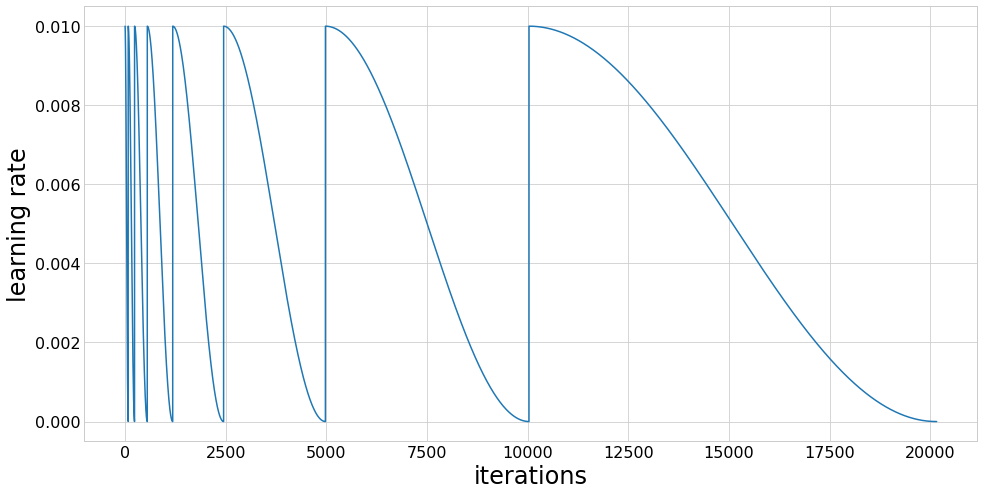

Fold took 267.701s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274193). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137620). Check your callbacks.
  % delta_t_median)


1 New best found: 3.557061191822868e-05
2 New best found: 3.441704573997413e-05
3 New best found: 3.414271168439882e-05
5 New best found: 3.383012489284738e-05
6 New best found: 3.305555499755428e-05
7 New best found: 3.289638618807658e-05
13 New best found: 3.288790455553681e-05
14 New best found: 3.263088627209072e-05
15 New best found: 3.258345554349944e-05
27 New best found: 3.234762050269637e-05
51 New best found: 3.229926007625181e-05
52 New best found: 3.2263162825256586e-05
54 New best found: 3.2187933460227214e-05
60 New best found: 3.2170863535066016e-05
61 New best found: 3.214190707367379e-05
63 New best found: 3.214100507029798e-05
CosineAnneal stalling after 255 epochs, entering redux decay at LR=3.860873294148472e-09
Early stopping after 265 epochs
Score is: {'loss': 3.214100507029798e-05, 'wAUC': 0.06471259416820141, 'AUC': 0.09817950342417991, 'AMS': 3.5696804668755444, 'cut': 0.9512327909469604}


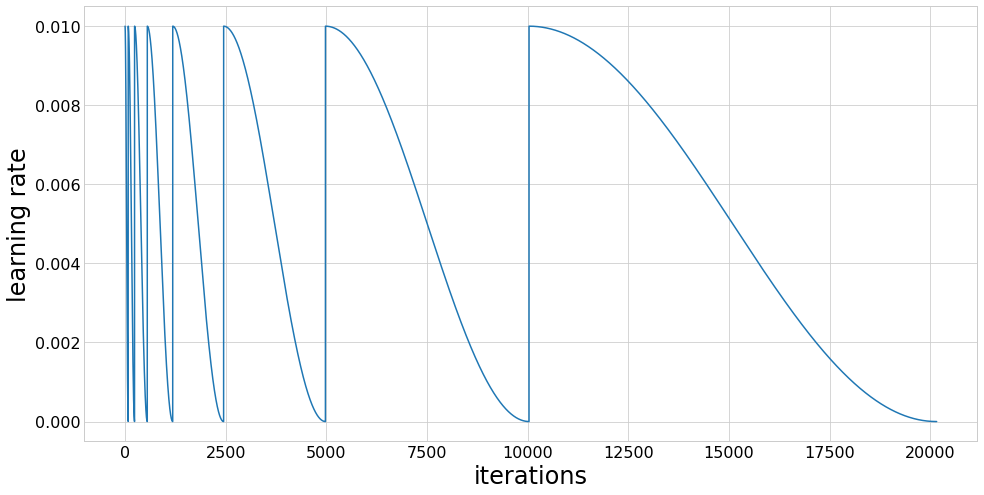

Fold took 263.938s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.289324). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145048). Check your callbacks.
  % delta_t_median)


1 New best found: 3.529346979537765e-05
2 New best found: 3.5051979347787464e-05
3 New best found: 3.349292762380307e-05
6 New best found: 3.318332581290726e-05
7 New best found: 3.298023064002903e-05
12 New best found: 3.2845903896974984e-05
13 New best found: 3.264223146120238e-05
14 New best found: 3.261190251878255e-05
15 New best found: 3.250755686873309e-05
27 New best found: 3.247911617809688e-05
28 New best found: 3.240459029840047e-05
29 New best found: 3.227841867807625e-05
30 New best found: 3.222364941588139e-05
31 New best found: 3.222253987363422e-05
55 New best found: 3.2189904109788324e-05
56 New best found: 3.2129420328090215e-05
57 New best found: 3.203433160505993e-05
62 New best found: 3.202916183564111e-05
63 New best found: 3.202811188905627e-05
CosineAnneal stalling after 255 epochs, entering redux decay at LR=3.860873294148472e-09
Early stopping after 265 epochs
Score is: {'loss': 3.202811188905627e-05, 'wAUC': 0.06440869742952993, 'AUC': 0.09974463973661252, 'A

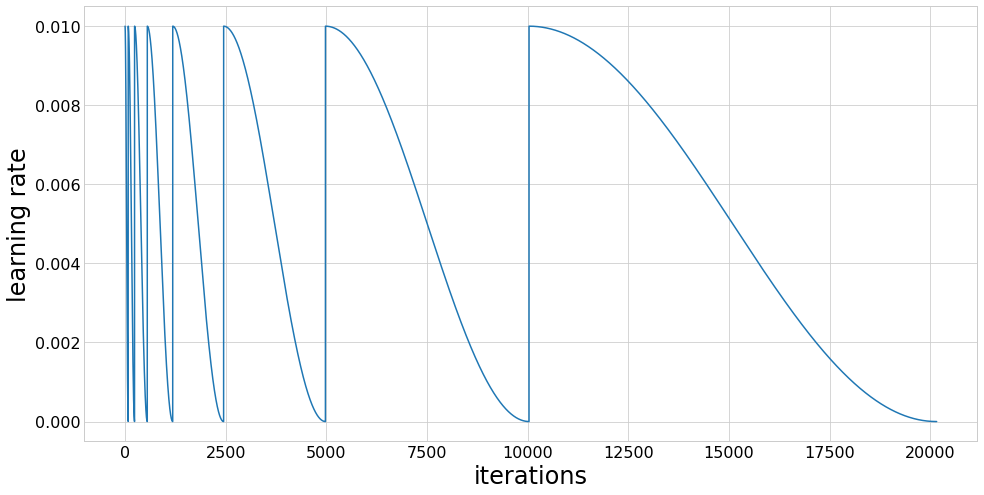

Fold took 266.807s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.301894). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151348). Check your callbacks.
  % delta_t_median)


1 New best found: 3.468552942940732e-05
2 New best found: 3.3736579661490394e-05
3 New best found: 3.3011663024080916e-05
6 New best found: 3.262896216037916e-05
7 New best found: 3.258327306539286e-05
12 New best found: 3.252513110346626e-05
13 New best found: 3.236294592934428e-05
14 New best found: 3.220385710301343e-05
15 New best found: 3.2161095188348556e-05
27 New best found: 3.211208762222668e-05
28 New best found: 3.202266258740565e-05
29 New best found: 3.188993380026659e-05
30 New best found: 3.1879138323711234e-05
31 New best found: 3.187322846497409e-05
56 New best found: 3.18588465655921e-05
58 New best found: 3.185325583472149e-05
61 New best found: 3.1847224207012916e-05
62 New best found: 3.1844739889493215e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=2.468924683601525e-05
128 New best found: 3.18429021834163e-05
Early stopping after 138 epochs
Score is: {'loss': 3.18429021834163e-05, 'wAUC': 0.06329511586864056, 'AUC': 0.09766519675151186, 'A

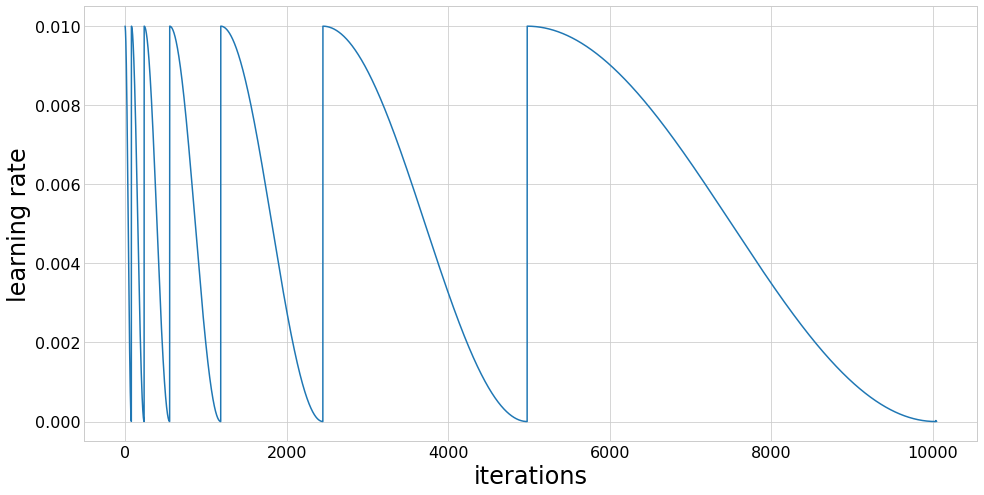

Fold took 141.188s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.329794). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165269). Check your callbacks.
  % delta_t_median)


1 New best found: 3.485777680616593e-05
2 New best found: 3.4565971628762784e-05
3 New best found: 3.325157666840823e-05
6 New best found: 3.230320519360248e-05
7 New best found: 3.1952714617364105e-05
13 New best found: 3.172571085306117e-05
14 New best found: 3.1639105308568106e-05
15 New best found: 3.156360318680527e-05
26 New best found: 3.154041954985587e-05
27 New best found: 3.1509421905502674e-05
28 New best found: 3.148193015804281e-05
29 New best found: 3.136339450575179e-05
30 New best found: 3.135376290447311e-05
31 New best found: 3.1343267974443736e-05
56 New best found: 3.131404797313735e-05
57 New best found: 3.127321097854292e-05
60 New best found: 3.122986803064123e-05
61 New best found: 3.1210214605380315e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=9.728959405692374e-05
128 New best found: 3.12049945248873e-05
Early stopping after 138 epochs
Score is: {'loss': 3.12049945248873e-05, 'wAUC': 0.061035395254123825, 'AUC': 0.09896953302713352, 

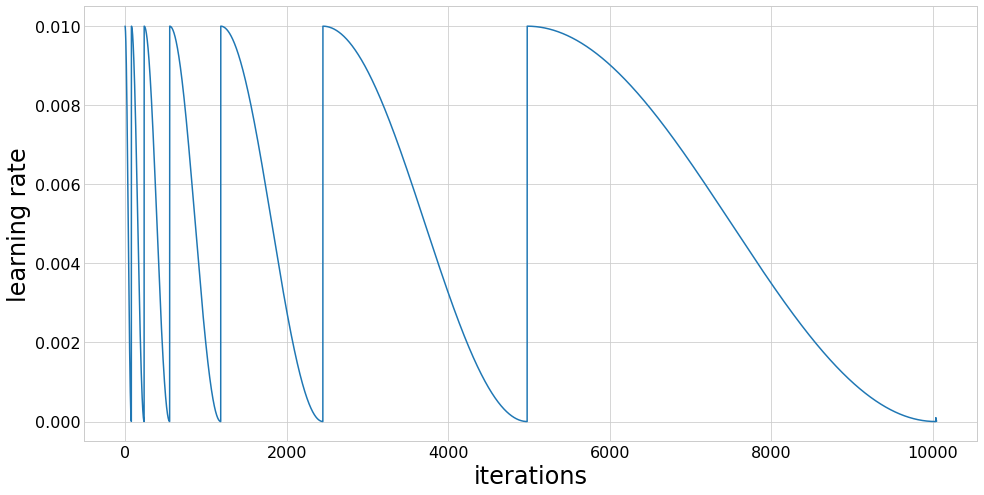

Fold took 145.117s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.378669). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189682). Check your callbacks.
  % delta_t_median)


1 New best found: 3.516772010321692e-05
3 New best found: 3.3947099732762825e-05
6 New best found: 3.3294265023575083e-05
12 New best found: 3.31959031139135e-05
13 New best found: 3.294775209481201e-05
14 New best found: 3.278506241764924e-05
15 New best found: 3.272295630954239e-05
26 New best found: 3.2688041233151357e-05
27 New best found: 3.2547738398935846e-05
28 New best found: 3.246299814599906e-05
29 New best found: 3.2344492178947135e-05
55 New best found: 3.2335179259443154e-05
57 New best found: 3.232571762766419e-05
58 New best found: 3.2217338276862e-05
59 New best found: 3.2194600752331044e-05
60 New best found: 3.21749563742131e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00021710572150489537
131 New best found: 3.21743222031445e-05
134 New best found: 3.217428175989473e-05
136 New best found: 3.2169462773180314e-05
Early stopping after 146 epochs
Score is: {'loss': 3.2169462773180314e-05, 'wAUC': 0.06491609854717362, 'AUC': 0.101603935365348

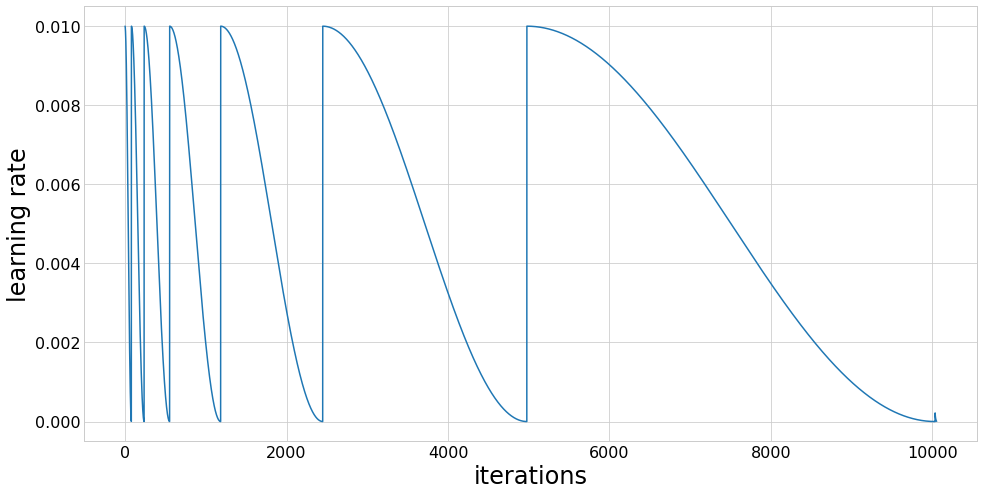

Fold took 154.469s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.399982). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200425). Check your callbacks.
  % delta_t_median)


1 New best found: 3.4647301024233456e-05
2 New best found: 3.419540251561557e-05
3 New best found: 3.334304443851579e-05
5 New best found: 3.261726344208e-05
7 New best found: 3.252753370034043e-05
12 New best found: 3.247593869455159e-05
13 New best found: 3.224558461952256e-05
14 New best found: 3.198958543507615e-05
15 New best found: 3.1963431750045856e-05
27 New best found: 3.178010010960861e-05
29 New best found: 3.173558238922851e-05
58 New best found: 3.168172092846362e-05
59 New best found: 3.16750889942341e-05
60 New best found: 3.165299374886672e-05
61 New best found: 3.1621746464225e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=9.728959405692374e-05
Early stopping after 137 epochs
Score is: {'loss': 3.1621746464225e-05, 'wAUC': 0.06261554748598319, 'AUC': 0.09677837647195131, 'AMS': 3.870132657783416, 'cut': 0.9481975436210632}


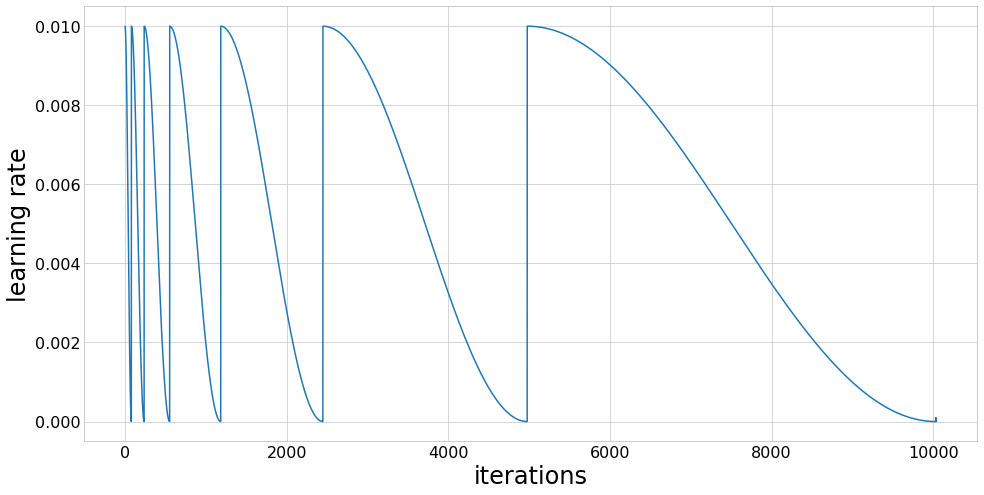

Fold took 147.182s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.416800). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208838). Check your callbacks.
  % delta_t_median)


1 New best found: 3.5533612254910114e-05
2 New best found: 3.541846902264622e-05
3 New best found: 3.410566309411729e-05
6 New best found: 3.3597838630737774e-05
7 New best found: 3.322007855478447e-05
12 New best found: 3.2925841856332435e-05
15 New best found: 3.268260466216579e-05
24 New best found: 3.263686132938684e-05
25 New best found: 3.261481041584876e-05
27 New best found: 3.260785406138451e-05
28 New best found: 3.242595812016612e-05
29 New best found: 3.2358841862292644e-05
30 New best found: 3.227542442998801e-05
31 New best found: 3.227405139037823e-05
56 New best found: 3.225047054968988e-05
57 New best found: 3.2201656576269704e-05
58 New best found: 3.217124494590744e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.0005933261367235058
128 New best found: 3.2152710506212946e-05
135 New best found: 3.21331457425285e-05
Early stopping after 145 epochs
Score is: {'loss': 3.21331457425285e-05, 'wAUC': 0.06495558616345021, 'AUC': 0.10023636896613475, 

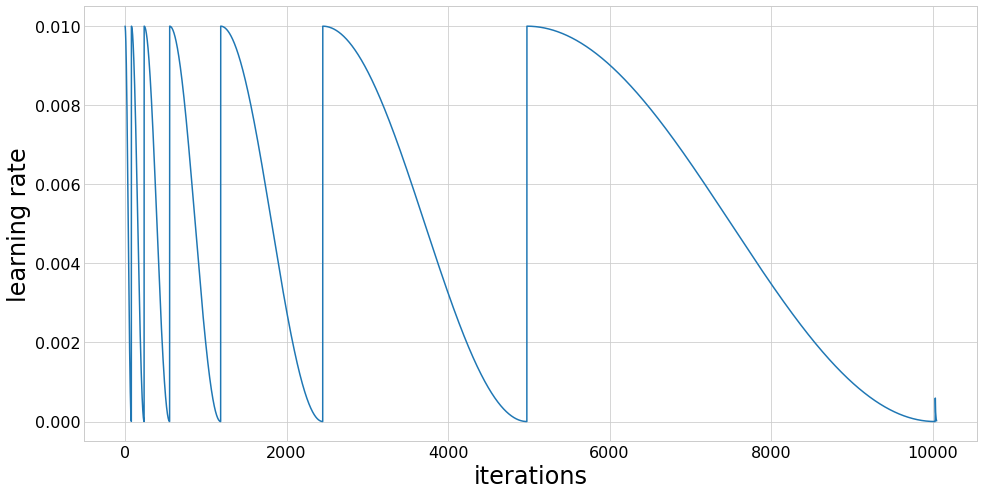

Fold took 160.995s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.467480). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234198). Check your callbacks.
  % delta_t_median)


1 New best found: 3.507393259293541e-05
3 New best found: 3.401805272367146e-05
6 New best found: 3.316853147252776e-05
7 New best found: 3.296594716620212e-05
12 New best found: 3.291672022748397e-05
14 New best found: 3.251753725424725e-05
15 New best found: 3.24932205910107e-05
26 New best found: 3.235934918426686e-05
27 New best found: 3.222567460580003e-05
28 New best found: 3.217640617018678e-05
29 New best found: 3.216050183738274e-05
59 New best found: 3.214615136333976e-05
60 New best found: 3.212015088141106e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00021710572150489537
128 New best found: 3.209738844344362e-05
Early stopping after 138 epochs
Score is: {'loss': 3.209738844344362e-05, 'wAUC': 0.06408540321149003, 'AUC': 0.10066558050202223, 'AMS': 3.828814218978276, 'cut': 0.9776234030723572}


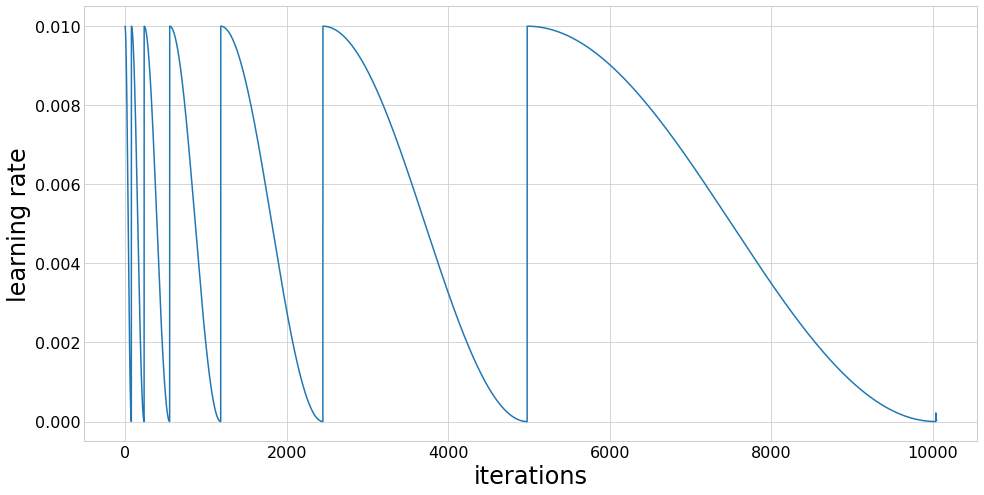

Fold took 151.383s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.469368). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235100). Check your callbacks.
  % delta_t_median)


1 New best found: 3.40687727724711e-05
3 New best found: 3.292713666167533e-05
6 New best found: 3.2507862407360835e-05
7 New best found: 3.217500502669967e-05
14 New best found: 3.184458344084191e-05
15 New best found: 3.170704443910123e-05
25 New best found: 3.170628174309286e-05
27 New best found: 3.1574488906776154e-05
29 New best found: 3.1437812115835786e-05
30 New best found: 3.1408722253551395e-05
31 New best found: 3.140178452718922e-05
59 New best found: 3.135731912120671e-05
60 New best found: 3.133858456668027e-05
61 New best found: 3.1331762758121444e-05
62 New best found: 3.132831919170849e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=2.468924683601525e-05
Early stopping after 137 epochs
Score is: {'loss': 3.132831919170849e-05, 'wAUC': 0.0614227647809763, 'AUC': 0.09757483318135585, 'AMS': 3.7651246141639656, 'cut': 0.9531362056732178}


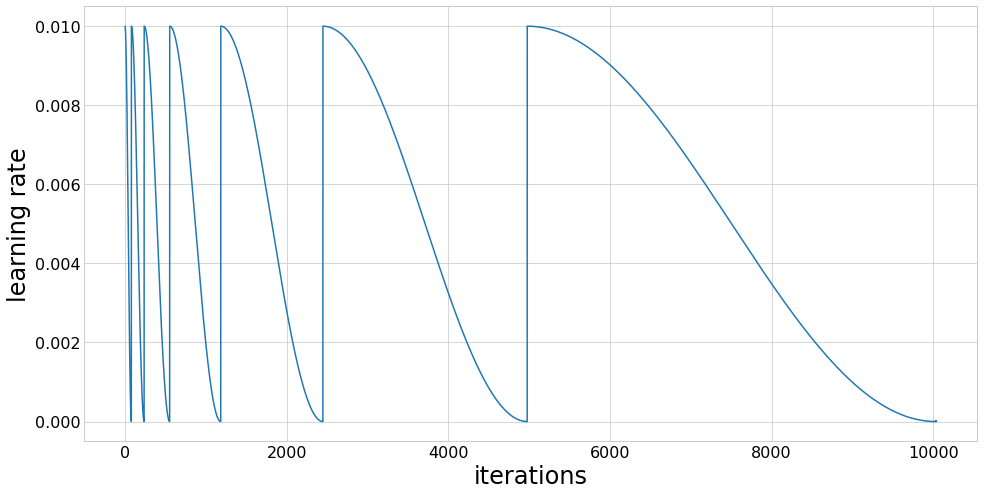

Fold took 153.483s


______________________________________
Training finished
Cross-validation took 1855.660s 


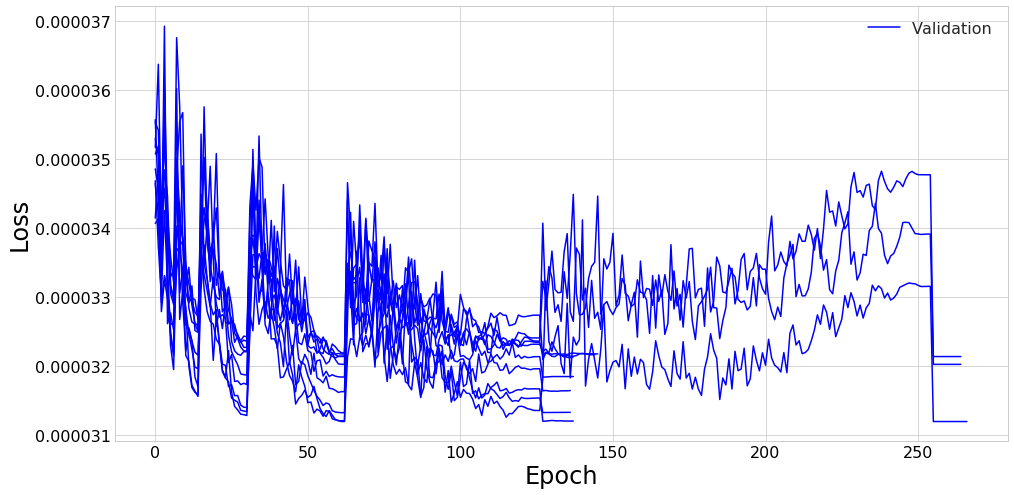

Mean loss = 3.18e-05 +- 1e-07
Mean wAUC = 0.0632 +- 0.0005
Mean AUC = 0.0988 +- 0.0005
Mean AMS = 3.84 +- 0.05
Mean cut = 0.959 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [10]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [11]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [12]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 0 with loss = 3.1200312126110154e-05
Model 1 is 4 with loss = 3.12049945248873e-05
Model 2 is 9 with loss = 3.132831919170849e-05
Model 3 is 6 with loss = 3.1621746464225e-05
Model 4 is 3 with loss = 3.18429021834163e-05
Model 5 is 2 with loss = 3.202811188905627e-05
Model 6 is 8 with loss = 3.209738844344362e-05
Model 7 is 7 with loss = 3.21331457425285e-05
Model 8 is 1 with loss = 3.214100507029798e-05
Model 9 is 5 with loss = 3.2169462773180314e-05


## Response on validation data

In [13]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [14]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0020092581190168856s per sample

Predicting fold 2 out of 10
Prediction took 0.00035183287858963014s per sample

Predicting fold 3 out of 10
Prediction took 0.00035646061450242996s per sample

Predicting fold 4 out of 10
Prediction took 0.00034091349318623543s per sample

Predicting fold 5 out of 10
Prediction took 0.0003611147217452526s per sample

Predicting fold 6 out of 10
Prediction took 0.00035621165335178375s per sample

Predicting fold 7 out of 10
Prediction took 0.00034741990119218827s per sample

Predicting fold 8 out of 10
Prediction took 0.0003550717793405056s per sample

Predicting fold 9 out of 10
Prediction took 0.0003512071818113327s per sample

Predicting fold 10 out of 10
Prediction took 0.00034996818751096724s per sample



In [15]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9029993645363462, weighted 0.9360202895018572


In [16]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.913214293663296, 0.9636178)

In [17]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=3.9+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.960770845063962, corresponds to calc_ams of 3.834095287843157
CPU times: user 2.59 s, sys: 14.1 s, total: 16.6 s
Wall time: 2min 17s


(3.9, 0.96)

# Test scoring

In [18]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [19]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0003543606622652574s per sample

Predicting fold 2 out of 10
Prediction took 0.0003440298790281469s per sample

Predicting fold 3 out of 10
Prediction took 0.00035562150112607263s per sample

Predicting fold 4 out of 10
Prediction took 0.00035244769115339627s per sample

Predicting fold 5 out of 10
Prediction took 0.00035247775438156993s per sample

Predicting fold 6 out of 10
Prediction took 0.00035078116140582343s per sample

Predicting fold 7 out of 10
Prediction took 0.0003500657565214417s per sample

Predicting fold 8 out of 10
Prediction took 0.0003503882903267037s per sample

Predicting fold 9 out of 10
Prediction took 0.0003472960792481899s per sample

Predicting fold 10 out of 10
Prediction took 0.00034656316353516147s per sample

CPU times: user 3min 25s, sys: 17.1 s, total: 3min 42s
Wall time: 3min 12s


In [21]:
score_test_data(test_fy.source, 0.960770845063962)

Public:Private AMS: 3.6273009765419117 : 3.703445431581649


(3.6273009765419117, 3.703445431581649)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)